In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('houses_train.csv')

In [5]:
df.head()

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,5546,130000.0,newly repaired,Center,4,Sayat Nova Ave,3,Yerevan,96.0,http://www.myrealty.am/en/item/28244/3-senyaka...,1,stone,3,3.2
1,2979,65000.0,good,Arabkir,5,Hr.Kochar St,3,Yerevan,78.0,http://www.myrealty.am/en/item/18029/3-senyaka...,1,stone,2,2.8
2,2698,129000.0,good,Center,10,M.Khorenatsi St,3,Yerevan,90.0,http://www.myrealty.am/en/item/37797/3-senyaka...,1,panel,3,2.8
3,4548,52000.0,newly repaired,Center,14,Argishti St,2,Yerevan,53.0,http://www.myrealty.am/en/item/36153/2-senyaka...,1,monolit,5,3.0
4,2982,65000.0,newly repaired,Center,12,Mashtots Ave,2,Yerevan,47.0,http://www.myrealty.am/en/item/17566/2-senyaka...,1,panel,3,2.8


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
df.columns

Index(['Unnamed: 0', 'price', 'condition', 'district', 'max_floor', 'street',
       'num_rooms', 'region', 'area', 'url', 'num_bathrooms', 'building_type',
       'floor', 'ceiling_height'],
      dtype='object')

In [8]:
df = df[df['price'] != 550000] #550000 ket@ hanel em qani vor aknhayt ktrvac er myusneric 
len(df)

4999

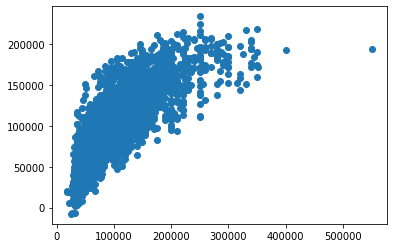

In [220]:
predictions = cross_val_predict(model, x, y, cv=10)
plt.scatter(y, predictions)

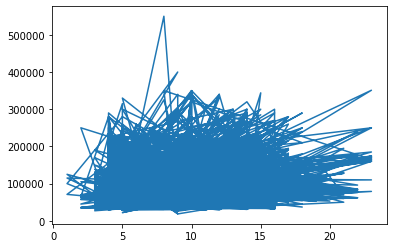

In [221]:
plt.plot(x['max_floor'],y)

In [9]:
df = df.reset_index()

In [10]:
df = pd.get_dummies(df[df.columns.difference(['url','region','Unnamed: 0','street'])]) # nshvac columneri arkayutayan depqum datai crvacutyun@ mecanum e ayrdyunqum stacvum e vat RMSE

In [11]:
df.head()

,area,ceiling_height,floor,index,max_floor,num_bathrooms,num_rooms,price,building_type_monolit,building_type_other,...,district_Center,district_Davtashen,district_Erebuni,district_Malatia-Sebastia,district_Nor Norq,district_Norq Marash,district_Nubarashen,district_Qanaqer-Zeytun,district_Shengavit,district_Vahagni district
0,96.0,3.2,3,0,4,1,3,130000.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,78.0,2.8,2,1,5,1,3,65000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90.0,2.8,3,2,10,1,3,129000.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,53.0,3.0,5,3,14,1,2,52000.0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,47.0,2.8,3,4,12,1,2,65000.0,0,0,...,1,0,0,0,0,0,0,0,0,0


# 1. train on all data

In [12]:
xTrain,yTrain = (df[df.columns.difference(['price'])], df['price'])

In [13]:
xTrain.head()

,area,building_type_monolit,building_type_other,building_type_panel,building_type_stone,ceiling_height,condition_good,condition_newly repaired,condition_zero condition,district_Achapnyak,...,district_Norq Marash,district_Nubarashen,district_Qanaqer-Zeytun,district_Shengavit,district_Vahagni district,floor,index,max_floor,num_bathrooms,num_rooms
0,96.0,0,0,0,1,3.2,0,1,0,0,...,0,0,0,0,0,3,0,4,1,3
1,78.0,0,0,0,1,2.8,1,0,0,0,...,0,0,0,0,0,2,1,5,1,3
2,90.0,0,0,1,0,2.8,1,0,0,0,...,0,0,0,0,0,3,2,10,1,3
3,53.0,1,0,0,0,3.0,0,1,0,0,...,0,0,0,0,0,5,3,14,1,2
4,47.0,0,0,1,0,2.8,0,1,0,0,...,0,0,0,0,0,3,4,12,1,2


In [14]:
yTrain.head()

0    130000.0
1     65000.0
2    129000.0
3     52000.0
4     65000.0
Name: price, dtype: float64

In [43]:
regr = linear_model.LinearRegression()
model = regr.fit(xTrain,yTrain) # The best result
predict = model.predict(xTrain)

In [44]:
regr.coef_, regr.intercept_

(array([ 1.17235195e+03,  1.25730843e+04,  2.56223423e+02, -1.10179606e+04,
        -1.81134711e+03,  2.30690729e+04,  1.38695184e+03,  1.31934604e+04,
        -1.45804122e+04, -8.77865323e+03,  1.12048391e+04, -1.05672492e+04,
         3.96181090e+04, -3.62245149e+02, -6.32576960e+03, -7.60767525e+03,
        -6.57385663e+03,  1.92571305e+04, -1.91089234e+04, -4.11604847e+02,
        -8.50887511e+03, -1.83522630e+03, -1.08900043e+02, -1.50694427e-01,
        -3.04368432e+00,  1.23094945e+04, -5.43141001e+03]),
 -98556.27717210079)

In [45]:
len(regr.coef_), len(df.columns)

(27, 28)

In [48]:
print(np.sqrt(mean_squared_error(yTrain, predict)))

28763.02264917254


In [49]:
print(r2_score(yTrain, predict))

0.6807619073923448


# 2. 10-Fold crossvalidation 

In [20]:
y = df['price']

In [21]:
y

0       130000.0
1        65000.0
2       129000.0
3        52000.0
4        65000.0
          ...   
4994     56000.0
4995    115000.0
4996    127000.0
4997     41800.0
4998     36000.0
Name: price, Length: 4999, dtype: float64

In [22]:
x = df[df.columns.difference(['price'])]
x.head()

,area,building_type_monolit,building_type_other,building_type_panel,building_type_stone,ceiling_height,condition_good,condition_newly repaired,condition_zero condition,district_Achapnyak,...,district_Norq Marash,district_Nubarashen,district_Qanaqer-Zeytun,district_Shengavit,district_Vahagni district,floor,index,max_floor,num_bathrooms,num_rooms
0,96.0,0,0,0,1,3.2,0,1,0,0,...,0,0,0,0,0,3,0,4,1,3
1,78.0,0,0,0,1,2.8,1,0,0,0,...,0,0,0,0,0,2,1,5,1,3
2,90.0,0,0,1,0,2.8,1,0,0,0,...,0,0,0,0,0,3,2,10,1,3
3,53.0,1,0,0,0,3.0,0,1,0,0,...,0,0,0,0,0,5,3,14,1,2
4,47.0,0,0,1,0,2.8,0,1,0,0,...,0,0,0,0,0,3,4,12,1,2


In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict 
lm = linear_model.LinearRegression()
model = lm.fit(x, y)

In [28]:
scores = cross_val_score(model, x, y, cv=10, scoring = 'neg_root_mean_squared_error')

In [29]:
print(scores)

[-29573.1477203  -29330.23979084 -26596.28732299 -29940.91501402
 -30635.96668622 -29158.05931126 -27777.36373514 -25816.82402536
 -32655.81473604 -26904.22671446]


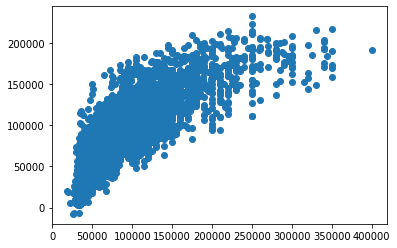

In [30]:
predictions = cross_val_predict(model, x, y, cv=10)
plt.scatter(y, predictions)

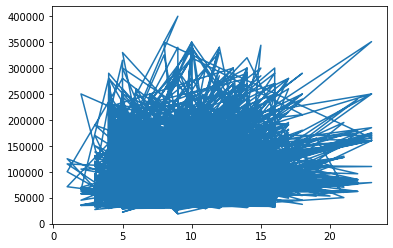

In [31]:
plt.plot(x['max_floor'],y)

In [32]:
np.mean(scores)

-28838.884505663642

# K-Fold


In [33]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(x)

10

In [34]:
test_rmse = []
train_rmse = []
for train_index, test_index in kf.split(x):
   
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    predictions_train = lm.predict(X_train)
    
    test_rmse.append(np.sqrt(mean_squared_error(y_test, predictions)))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, predictions_train)))

In [35]:
print(train_rmse)
print(test_rmse)

[28677.08593589231, 28710.564452460345, 29000.50703814251, 28635.831999804068, 28557.934839191996, 28725.733521261747, 28876.12956630589, 29077.20307908904, 28313.551951433856, 28974.98681054548]
[29573.14772030295, 29330.23979084434, 26596.287322991735, 29940.915014019825, 30635.966686219275, 29158.05931126005, 27777.36373513778, 25816.824025359136, 32655.814736044333, 26904.226714457007]


In [36]:
np.mean(train_rmse)

28754.952919412724

In [37]:
np.mean(test_rmse)

28838.884505663642

# 3. Ridge regression

In [38]:
from sklearn.linear_model import Ridge

In [39]:
rr = Ridge(alpha=0.00001) # alphai tasnordakan karg@ mecacnelis ardyunq@ motenum e 1-in, sakayn harc e te inchu alphan = 0 -i depqum amboxjovin havasar chi linum
rr.fit(x, y)
w = rr.coef_

In [40]:
w

array([ 1.17235196e+03,  1.25730786e+04,  2.56217764e+02, -1.10179663e+04,
       -1.81135268e+03,  2.30690706e+04,  1.38695114e+03,  1.31934597e+04,
       -1.45804124e+04, -8.77866404e+03,  1.12048278e+04, -1.05672599e+04,
        3.96180976e+04, -3.62256313e+02, -6.32577997e+03, -7.60768619e+03,
       -6.57386761e+03,  1.92570803e+04, -1.91087436e+04, -4.11616075e+02,
       -8.50888583e+03, -1.83522828e+03, -1.08900052e+02, -1.50694404e-01,
       -3.04368921e+00,  1.23094948e+04, -5.43141020e+03])

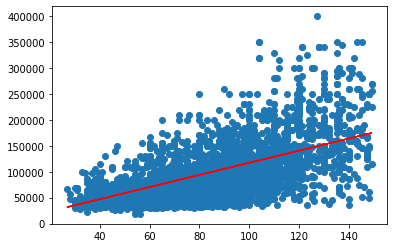

In [41]:
plt.scatter(x.iloc[:,0], y)
plt.plot(x.iloc[:,0], w[0]*x.iloc[:,0], c='red')

In [42]:
rr.predict(x)
print(np.sqrt(mean_squared_error(y, rr.predict(x))))

28763.022649172697


# The best result is 1 (RMSE = 28763.02264917254)